## Exercice 8

- Fichier de données: CourbePoidsTaille.csv
- Descriptif: Poids à 1 kg près et taille à 1 cm près d’un échantillon de 12 étudiants de sexe masculin tirés au hasard parmi les étudiants de 1ière année d’une université

    - Représenter le nuage de points correspondant
    - Construire les droites des moindres carrés qui ajuste ces données, en utilisant respectivement le poids et la taille comme variable indépendante (variable explicative)
    - Donner leurs équations
    - Estimer la taille d’un étudiant dont le poids serait de 63 kilogrammes
    - Estimer le poids d’un étudiant dont la taille serait de 178 centimètres

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [16]:
input_df = pd.read_csv("CourbePoidsTaille.csv",sep=";")

In [17]:
input_df

,Poids (kilogramme),Taille (centimetre)
0,70,155
1,63,150
2,72,180
3,60,135
4,66,156
5,70,168
6,74,178
7,65,160
8,62,132
9,67,145


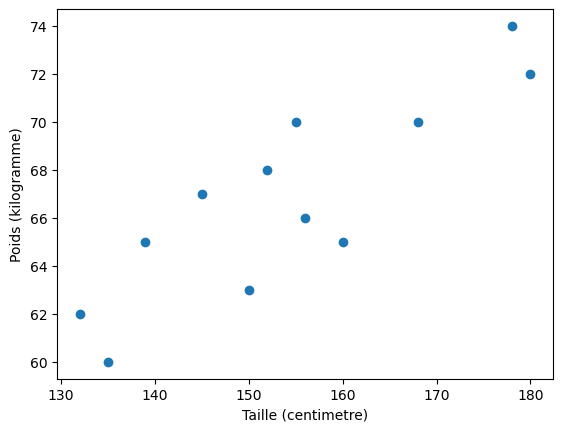

In [18]:
plt.plot(input_df['Taille (centimetre)'],input_df['Poids (kilogramme)'],'o')
plt.xlabel('Taille (centimetre)')
plt.ylabel('Poids (kilogramme)')
plt.show()

In [19]:
input_df = input_df.rename(columns={'Taille (centimetre)':'Taille','Poids (kilogramme)':'Poids'})

In [20]:
input_df

,Poids,Taille
0,70,155
1,63,150
2,72,180
3,60,135
4,66,156
5,70,168
6,74,178
7,65,160
8,62,132
9,67,145


In [21]:
input_df.cov()

,Poids,Taille
Poids,17.424242,56.030303
Taille,56.030303,241.787879


In [22]:
a = input_df.cov()['Poids']['Taille']/input_df.cov()['Taille']['Taille']

In [23]:
b = input_df['Poids'].mean() - a * input_df['Taille'].mean()

In [24]:
a, b

(0.23173329991226965, 31.10778293019176)

In [25]:
input_df['Modele Poids vs Taille'] = a * input_df['Taille'] + b

In [26]:
input_df

,Poids,Taille,Modele Poids vs Taille
0,70,155,67.026444
1,63,150,65.867778
2,72,180,72.819777
3,60,135,62.391778
4,66,156,67.258178
5,70,168,70.038977
6,74,178,72.356310
7,65,160,68.185111
8,62,132,61.696579
9,67,145,64.709111


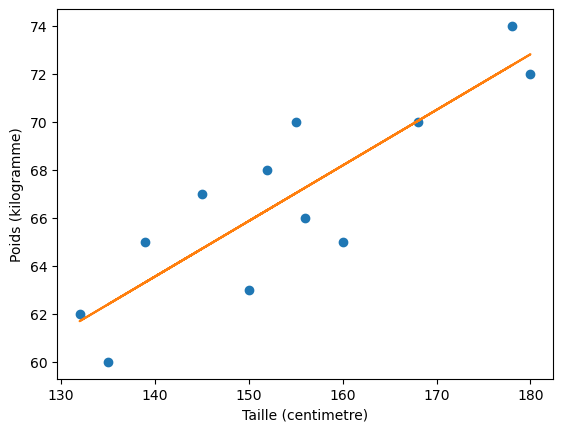

In [27]:
plt.plot(input_df['Taille'],input_df['Poids'],'o')
plt.plot(input_df['Taille'],input_df['Modele Poids vs Taille'],'-')
plt.xlabel('Taille (centimetre)')
plt.ylabel('Poids (kilogramme)')
plt.show()

Ceci correspond donc à l'explication du poids par la taille.

Poids estimé d'un étudiant de 1m78:

In [28]:
a*178+b

72.35631031457575

Même exercice mais dans l'autre sens, soit estimer la taille à partir du poids...

In [29]:
aa = input_df.cov()['Poids']['Taille']/input_df.cov()['Poids']['Poids']

In [30]:
bb = input_df['Taille'].mean() - aa * input_df['Poids'].mean()

In [31]:
aa,bb

(3.215652173913043, -60.74608695652171)

In [32]:
input_df['Modele Taille vs Poids'] = aa * input_df['Poids'] + bb

In [33]:
input_df

,Poids,Taille,Modele Poids vs Taille,Modele Taille vs Poids
0,70,155,67.026444,164.349565
1,63,150,65.867778,141.840000
2,72,180,72.819777,170.780870
3,60,135,62.391778,132.193043
4,66,156,67.258178,151.486957
5,70,168,70.038977,164.349565
6,74,178,72.356310,177.212174
7,65,160,68.185111,148.271304
8,62,132,61.696579,138.624348
9,67,145,64.709111,154.702609


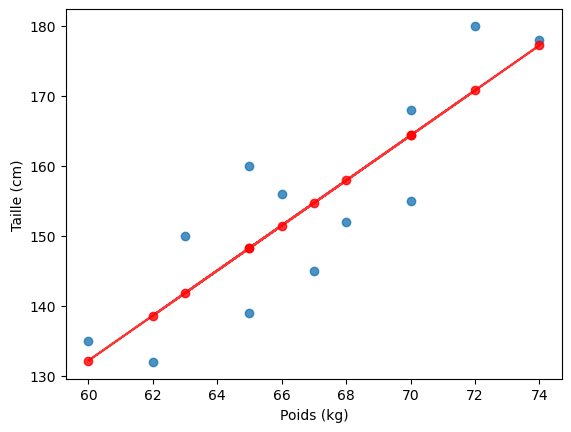

In [34]:
plt.plot(input_df['Poids'],input_df['Taille'],'o',alpha=0.8)
plt.plot(input_df['Poids'],input_df['Modele Taille vs Poids'],'-o',alpha=0.8,color='red')
plt.xlabel('Poids (kg)')
plt.ylabel('Taille (cm)')
plt.show()

Taille estimée d'une personne pesant 63 kg:

In [35]:
aa*63+bb

141.84

Représentons les deux analyses (explication du poids en fonction de la taille ou l'inverse) dans un même graphe 
et reprenons les deux estimations demandées: poids d'une personne de 1m78 pour le premier modèle et taille d'une personne 
de 63 kg pour le deuxième modèle.

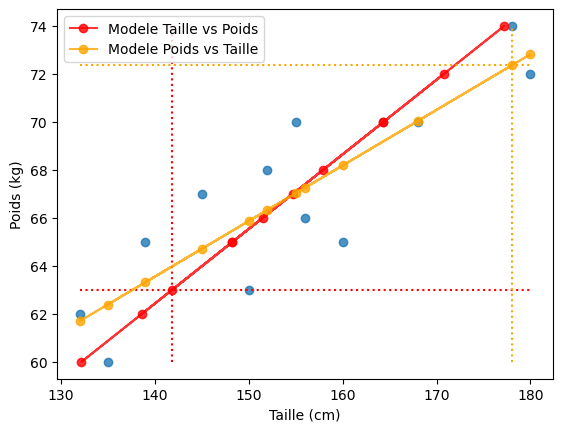

In [46]:
plt.plot(input_df['Taille'],input_df['Poids'],'o',alpha=0.8)

plt.plot(input_df['Modele Taille vs Poids'], input_df['Poids'], '-o', alpha=0.8, color='red', label='Modele Taille vs Poids')
plt.hlines(y=63, xmin=np.min(input_df['Taille']), xmax=np.max(input_df['Taille']), color='red', linestyles='dotted')
plt.vlines(x=aa*63+bb, ymin=np.min(input_df['Poids']), ymax=np.max(input_df['Poids']), color='red', linestyles='dotted')

plt.plot(input_df['Taille'], input_df['Modele Poids vs Taille'], '-o', alpha=0.8, color='orange', label='Modele Poids vs Taille')
plt.vlines(x=178, ymin=np.min(input_df['Poids']), ymax=np.max(input_df['Poids']), color='orange', linestyles='dotted')
plt.hlines(y=a*178+b, xmin=np.min(input_df['Taille']), xmax=np.max(input_df['Taille']), color='orange', linestyles='dotted')

plt.ylabel('Poids (kg)')
plt.xlabel('Taille (cm)')
plt.legend()
plt.show()